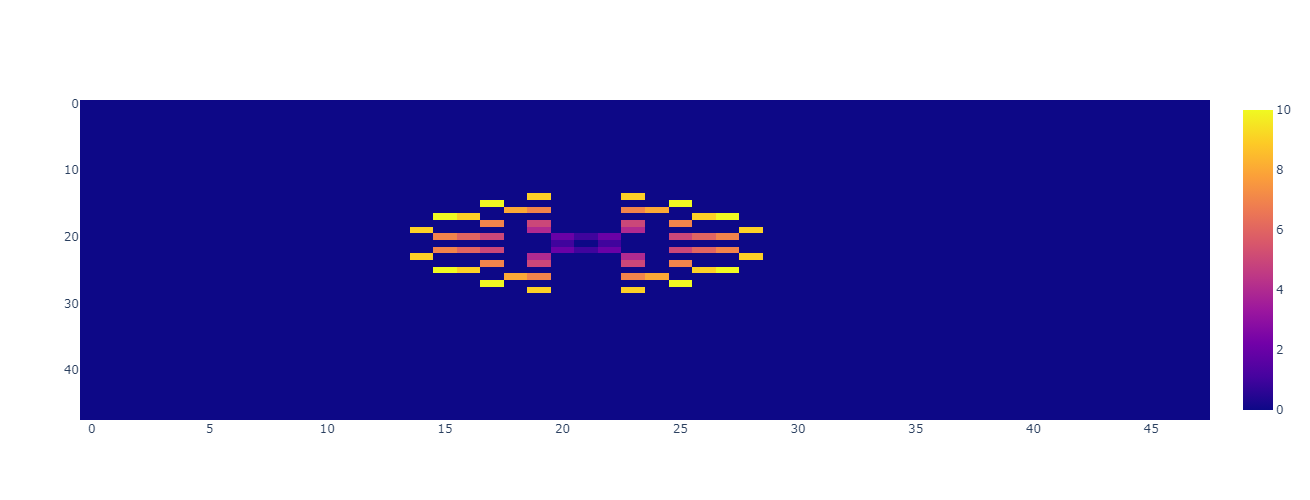

In [14]:
import numpy as np
from typing import Tuple

import util
from util import generate_circle_coordinates_array

# Example usage:
center = (21, 21)
N = 10
radius = 4
max_coord = 48
gap_size = 1

array = np.zeros((max_coord, max_coord))
for r, N in zip([3,4,5,6,7], [8, 10,14,14,20]):
    coord_array = generate_circle_coordinates_array(center, N, r, max_coord, gap_size)
    array = np.logical_or(coord_array, array).astype(int)

dist_array = util.pad_and_crop(util.manhattan_kernel(20), array, center[0], center[1])
array = np.logical_or(array, util.pad_and_crop(np.ones((3,3)), array, center[0], center[1])).astype(int)
# print(coord_array)
array 

fig = util.show_map_array(array*dist_array).update_layout(height=500, width=500)
fig.show()


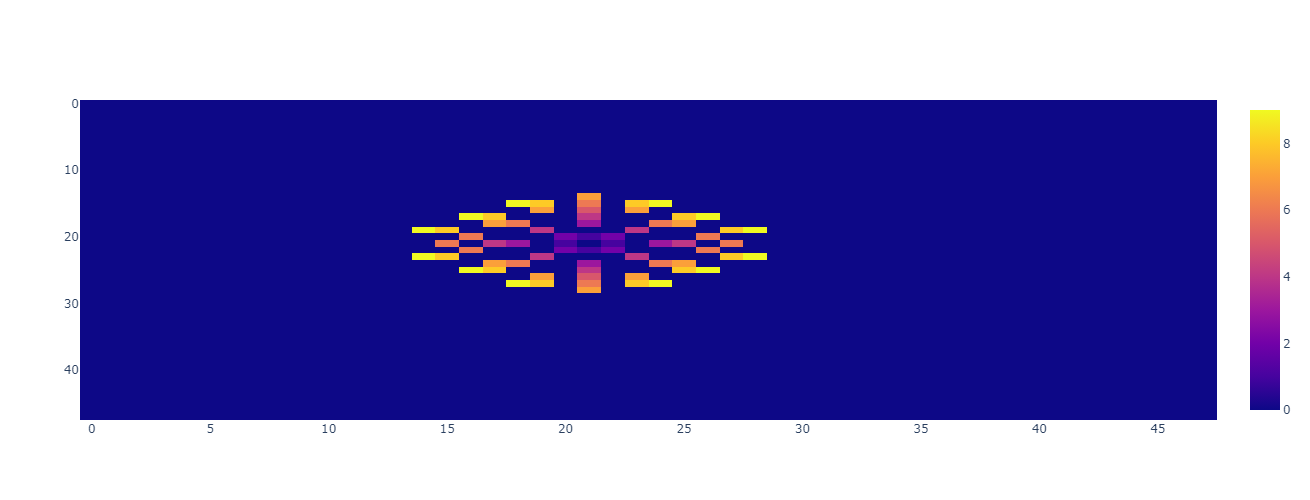

In [26]:
import numpy as np
from typing import Tuple

import util

def generate_circle_coordinates_array(center: Tuple[int, int], N: int, radius: float, max_coord: int) -> np.ndarray:
    x, y = center
    angles = np.linspace(0, 2 * np.pi, N + 1)[:-1]  # Exclude the last angle (2 * pi) to avoid overlap

    # Initialize an empty numpy array
    coord_array = np.zeros((max_coord, max_coord))

    for angle in angles:
        # Check if the angle is in one of the cardinal direction gaps
        angle_deg = np.degrees(angle) % 360
        new_x = round(x + radius * np.cos(angle))
        new_y = round(y + radius * np.sin(angle))

        # Check if the coordinates are within the specified range
        if 0 < new_x < max_coord and 0 < new_y < max_coord:
            coord_array[new_y, new_x] = 1  # Set the value at the coordinate to 1

    return coord_array

# Example usage:
center = (21, 21)
N = 10
radius = 4
max_coord = 48
gap_size = 4

array = np.zeros((max_coord, max_coord))
for r, N in zip([3,4,5,6,7], [8, 8,14,16,14]):
    coord_array = generate_circle_coordinates_array(center, N, r, max_coord)
    array = np.logical_or(coord_array, array).astype(int)

dist_array = util.pad_and_crop(util.manhattan_kernel(20), array, center[0], center[1])
array = np.logical_or(array, util.pad_and_crop(np.ones((3,3)), array, center[0], center[1])).astype(int)
# print(coord_array)
array 

fig = util.show_map_array(array*dist_array).update_layout(height=500, width=500)
fig.show()


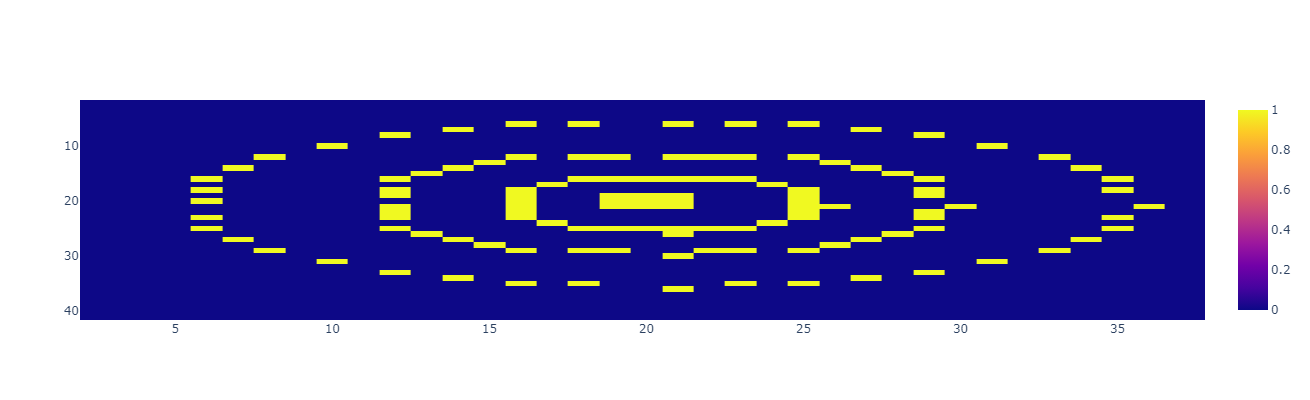

In [24]:
import numpy as np
from typing import Tuple

def generate_circle_coordinates_array(center: Tuple[int, int], N: int, radius: float, max_coord: int, gap_cells: int = 0) -> np.ndarray:
    x, y = center
    angles = np.linspace(0, 2 * np.pi, N + 1)[:-1]  # Exclude the last angle (2 * pi) to avoid overlap

    # Initialize an empty numpy array
    coord_array = np.zeros((max_coord, max_coord))

    for angle in angles:
        new_x = int(x + radius * np.cos(angle))
        new_y = int(y + radius * np.sin(angle))

        # Check if the coordinates are within the specified range
        if 0 < new_x < max_coord and 0 < new_y < max_coord:
            # Check if the coordinates are in one of the cardinal direction gaps
            if gap_cells > 0:
                x_gap = abs(new_x - x) < gap_cells
                y_gap = abs(new_y - y) < gap_cells

                if (x_gap and (new_y == y)) or (y_gap and (new_x == x)):
                    continue

            coord_array[new_y, new_x] = 1  # Set the value at the coordinate to 1

    return coord_array

# Example usage:
# center = (50, 50)
N = 40
# radius = 10
# max_coord = 100
gap_cells = 3

# coord_array = generate_circle_coordinates_array(center, N, radius, max_coord, gap_cells)
# print(coord_array)

array = np.zeros((max_coord, max_coord))
for r in [5,9,15]:
    coord_array = generate_circle_coordinates_array(center, N, r, max_coord, gap_cells)
    array = np.logical_or(coord_array, array).astype(int)

array = np.logical_or(array, util.pad_and_crop(np.ones((3,3)), array, center[0]-1, center[1]-1)).astype(int)
# print(coord_array)

fig = util.show_map_array(array)
fig.show()

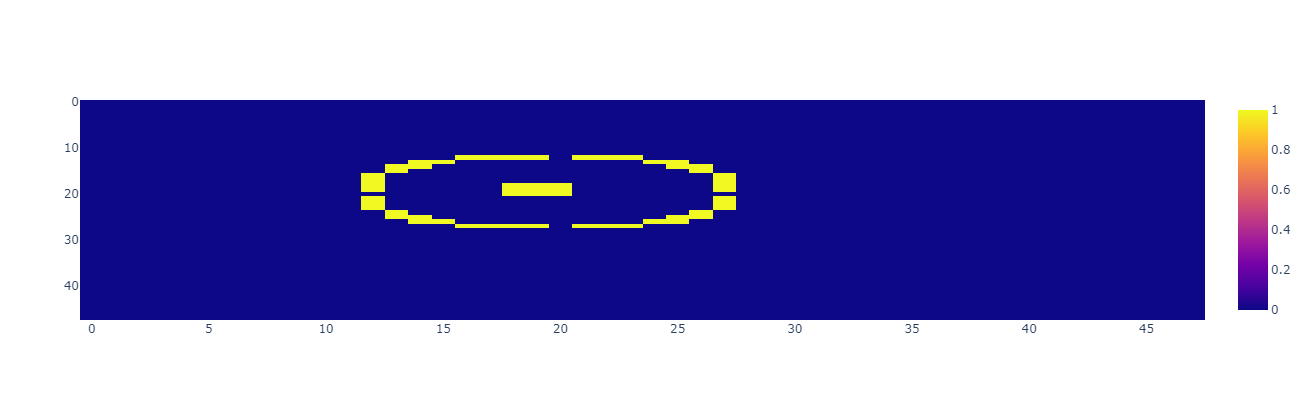

In [41]:
def generate_circle_coordinates_array(center: Tuple[int, int], N: int, radius: float, max_coord: int, gap_cells: int = 0) -> np.ndarray:
    x, y = center
    angles = np.linspace(0, 2 * np.pi, N + 1)[:-1]  # Exclude the last angle (2 * pi) to avoid overlap

    # Initialize an empty numpy array
    coord_array = np.zeros((max_coord, max_coord))

    for angle in angles:
        new_x = int(x + radius * np.cos(angle))
        new_y = int(y + radius * np.sin(angle))

        # Check if the coordinates are within the specified range
        if 0 < new_x < max_coord and 0 < new_y < max_coord:
            # Check if the coordinates are in one of the cardinal direction gaps
            if gap_cells > 0:
                x_diff = abs(new_x - x)
                y_diff = abs(new_y - y)

                x_gap = x_diff <= gap_cells and y_diff <= 0
                y_gap = y_diff <= gap_cells and x_diff <= 0

                if x_gap or y_gap:
                    continue

            coord_array[new_y, new_x] = 1  # Set the value at the coordinate to 1

    return coord_array


center = (20, 20)
N = 100
radius = 3
max_coord = 48
gap_cells = 40

array = np.zeros((max_coord, max_coord))
for r in [8]:
    coord_array = generate_circle_coordinates_array(center, N, r, max_coord, gap_cells)
    array = np.logical_or(coord_array, array).astype(int)

array = np.logical_or(array, util.pad_and_crop(np.ones((3,3)), array, center[0]-1, center[1]-1)).astype(int)
# print(coord_array)

fig = util.show_map_array(array)
fig.show()

In [ ]:

@dataclass
class Contact:
    name: str
    phone: str

@dataclass
class Person:
    name: str
    age: int
    
    @dataclass
    class Address:
        street: str
        city: str
        zip_code: str


In [27]:
import numpy as np
from functools import reduce

# Create a list of sample 2D arrays
arrays = [
    np.array([[0, 1, 0], [1, 0, 1], [0, 0, 1]]),
    np.array([[1, 0, 1], [0, 1, 0], [0, 1, 0]]),
    np.array([[0, 0, 1], [1, 1, 0], [1, 0, 0]]),
    # Add more arrays as needed
]

# Perform logical OR operation between all arrays in the list
combined_array = reduce(np.logical_or, arrays)

# Convert the result back to integers (0s and 1s)
combined_array = combined_array.astype(int)

print(combined_array)


[[1 1 1]
 [1 1 1]
 [1 1 1]]


In [32]:
import pandas as pd
from typing import List, Tuple, Dict

In [101]:
import pandas as pd

# Create a simple DataFrame
data = {
    'A': [1, 2, 3],
    'B': [4, 5, 6],
    'C': [7, 8, 9]
}

df = pd.DataFrame(data, index=['row1', 'row2', 'row3'])
print("Original DataFrame:")
print(df)

# Duplicate a row with a new index
row_to_duplicate = 'row2'
new_index = 'row4'

# Extract the row and assign a new index
duplicated_row = df.loc[[row_to_duplicate]].copy()
duplicated_row.index = [new_index]

# Append the duplicated row to the DataFrame
df = pd.concat([df, duplicated_row])
print("\nDataFrame with duplicated row:")
print(df)


Original DataFrame:
      A  B  C
row1  1  4  7
row2  2  5  8
row3  3  6  9

DataFrame with duplicated row:
      A  B  C
row1  1  4  7
row2  2  5  8
row3  3  6  9
row4  2  5  8


In [98]:
first_row

Mine ore        2.0
Mine ice        0.3
Clear rubble    0.5
Clear lichen    0.0
Attack          0.0
Defend          1.0
Transfer        0.0
Waiting         0.0
Name: 20.0, dtype: float64

In [ ]:

DESIRES_DF = pd.DataFrame(_desires_dict,index=['start', 'early', 'mid', 'late', 'end'],  dtype=float)
first_row = DESIRES_DF.loc['start'].copy()
first_row.index = ['zero']
DESIRES_DF = pd.concat(DESIRES_DF, first_row)
DESIRES_DF

In [106]:
first_row.index 

Int64Index([0], dtype='int64')

In [109]:
_desires_dict = {
    "step": [20, 200, 500, 850, 1000],
    "Mine ore": [2, 1, 0.5, 0.2, 0],
    "Mine ice": [0.3, 1, 2, 4, 1],
    "Clear rubble": [0.5, 2, 2, 4, 2],
    "Clear lichen": [0, 0, 1, 2, 5],
    "Attack": [0, 1, 2, 3, 0.5],
    "Defend": [1, 1, 1, 1, 2],
    "Transfer": [0, 0.5, 1, 2, 0],
    "Waiting": [0, 0, 1, 2, 0],
}
DESIRES_DF = pd.DataFrame(_desires_dict, dtype=float).set_index('step')
_first_row = DESIRES_DF.iloc[[0]].copy()
_first_row.index = [0]
DESIRES_DF = pd.concat([DESIRES_DF, first_row]).sort_index()
DESIRES_DF

,Mine ore,Mine ice,Clear rubble,Clear lichen,Attack,Defend,Transfer,Waiting
0.0,2.0,0.3,0.5,0.0,0.0,1.0,0.0,0.0
20.0,2.0,0.3,0.5,0.0,0.0,1.0,0.0,0.0
200.0,1.0,1.0,2.0,0.0,1.0,1.0,0.5,0.0
500.0,0.5,2.0,2.0,1.0,2.0,1.0,1.0,1.0
850.0,0.2,4.0,4.0,2.0,3.0,1.0,2.0,2.0
1000.0,0.0,1.0,2.0,5.0,0.5,2.0,0.0,0.0


In [110]:
# for col in temp_df.columns:
#         temp_df[col] = pd.to_numeric(temp_df[col], errors='coerce')
desires_df = DESIRES_DF
temp_df = pd.concat([desires_df, pd.DataFrame({}, index=[step])]).sort_index()
# temp_df = pd.concat([desires_df, pd.DataFrame({"step": [step]}, index=["input"])]).sort_values("step")
# temp_df = temp_df.set_index('step')
# DESIRES_DF.interpolate(method='index')
temp_df.interpolate(method='index')
                

,Mine ore,Mine ice,Clear rubble,Clear lichen,Attack,Defend,Transfer,Waiting
0.0,2.000000,0.300000,0.500000,0.0,0.000000,1.0,0.000000,0.0
20.0,2.000000,0.300000,0.500000,0.0,0.000000,1.0,0.000000,0.0
21.0,1.994444,0.303889,0.508333,0.0,0.005556,1.0,0.002778,0.0
200.0,1.000000,1.000000,2.000000,0.0,1.000000,1.0,0.500000,0.0
500.0,0.500000,2.000000,2.000000,1.0,2.000000,1.0,1.000000,1.0
850.0,0.200000,4.000000,4.000000,2.0,3.000000,1.0,2.000000,2.0
1000.0,0.000000,1.000000,2.000000,5.0,0.500000,2.0,0.000000,0.0


In [119]:
def get_interpolated_values(step, desires_df):
    # desires_df = DESIRES_DF.set_index('step')
    desires_df = DESIRES_DF

    # Add the input step to the DataFrame
    temp_df = pd.concat([desires_df, pd.DataFrame({}, index=[step])]).sort_index()
    
    # Make sure no duplicated rows
    temp_df = temp_df.groupby(temp_df.index).first()

    # Interpolate the values at the input step
    interpolated_df = temp_df.interpolate(method="index")

    # Get the interpolated values for the input step
    interpolated_values = interpolated_df.loc[step]

    return interpolated_values


In [121]:
from IPython.display  import display
df = DESIRES_DF
# df = DESIRES_DF
for step in [0, 10, 21, 100, 400, 850, 950]:
    display(get_interpolated_values(step, df))
print('done')

Mine ore        2.0
Mine ice        0.3
Clear rubble    0.5
Clear lichen    0.0
Attack          0.0
Defend          1.0
Transfer        0.0
Waiting         0.0
Name: 0.0, dtype: float64

Mine ore        2.0
Mine ice        0.3
Clear rubble    0.5
Clear lichen    0.0
Attack          0.0
Defend          1.0
Transfer        0.0
Waiting         0.0
Name: 10.0, dtype: float64

Mine ore        1.994444
Mine ice        0.303889
Clear rubble    0.508333
Clear lichen    0.000000
Attack          0.005556
Defend          1.000000
Transfer        0.002778
Waiting         0.000000
Name: 21.0, dtype: float64

Mine ore        1.555556
Mine ice        0.611111
Clear rubble    1.166667
Clear lichen    0.000000
Attack          0.444444
Defend          1.000000
Transfer        0.222222
Waiting         0.000000
Name: 100.0, dtype: float64

Mine ore        0.666667
Mine ice        1.666667
Clear rubble    2.000000
Clear lichen    0.666667
Attack          1.666667
Defend          1.000000
Transfer        0.833333
Waiting         0.666667
Name: 400.0, dtype: float64

Mine ore        0.2
Mine ice        4.0
Clear rubble    4.0
Clear lichen    2.0
Attack          3.0
Defend          1.0
Transfer        2.0
Waiting         2.0
Name: 850.0, dtype: float64

Mine ore        0.066667
Mine ice        2.000000
Clear rubble    2.666667
Clear lichen    4.000000
Attack          1.333333
Defend          1.666667
Transfer        0.666667
Waiting         0.666667
Name: 950.0, dtype: float64

done


In [128]:
[1,2,3][3]

IndexError: list index out of range